In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
#splitting input and output as independent and dependent variables

independent = dataset[["YearsExperience"]]
independent

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [6]:
dependent = dataset[["Salary"]]
dependent

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


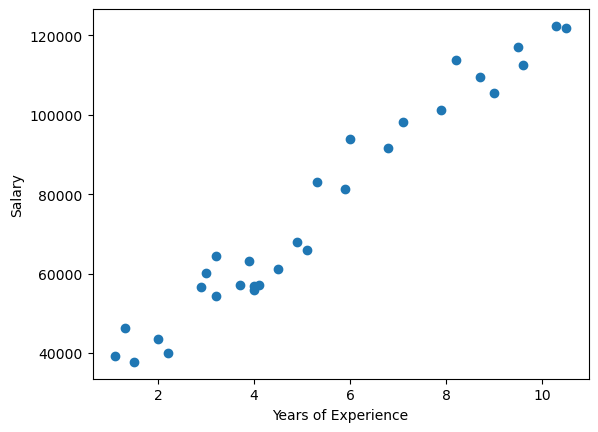

In [7]:
#plotting values in a graph

plt.scatter(independent, dependent)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [8]:
#splitting training set and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size = 0.30, random_state = 0)
print('X_train -> ',x_train)
print('X_test -> ',x_test)
print('Y_train -> ',y_train)
print('Y_test -> ',y_test)

X_train ->      YearsExperience
22              7.9
5               2.9
16              5.1
8               3.2
14              4.5
23              8.2
20              6.8
1               1.3
29             10.5
6               3.0
4               2.2
18              5.9
19              6.0
9               3.7
7               3.2
25              9.0
3               2.0
0               1.1
21              7.1
15              4.9
12              4.0
X_test ->      YearsExperience
2               1.5
28             10.3
13              4.1
10              3.9
26              9.5
24              8.7
27              9.6
11              4.0
17              5.3
Y_train ->        Salary
22  101302.0
5    56642.0
16   66029.0
8    64445.0
14   61111.0
23  113812.0
20   91738.0
1    46205.0
29  121872.0
6    60150.0
4    39891.0
18   81363.0
19   93940.0
9    57189.0
7    54445.0
25  105582.0
3    43525.0
0    39343.0
21   98273.0
15   67938.0
12   56957.0
Y_test ->        Salary
2    37731.0
28

In [9]:
#model creation

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [10]:
#viewing weight and bias values

weight = regressor.coef_
bias = regressor.intercept_
weight, bias

(array([[9360.26128619]]), array([26777.3913412]))

In [11]:
#testing the test set

y_pred = regressor.predict(x_test)

In [12]:
#Evaluation metrics

from sklearn.metrics import r2_score
r_score = r2_score(y_test, y_pred)
r_score

0.9740993407213511

In [13]:
#save the best model

import pickle as pck
filename = 'finalized_model.sav'
pck.dump(regressor, open(filename, 'wb'))

In [14]:
#unit testing the saved model

load_model = pck.load(open('finalized_model.sav', 'rb'))
result = load_model.predict([[15]])
print(result)

[[167181.3106341]]


C:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
